# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [85]:
import pandas as pd
from scipy import stats
from statsmodels.stats.weightstats import ztest
%pylab inline
import seaborn as sns
sns.set_style("white")
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0

In [86]:
df.describe()

temperature  heart_rate
count   130.000000  130.000000
mean     98.249231   73.761538
std       0.733183    7.062077
min      96.300000   57.000000
25%      97.800000   69.000000
50%      98.300000   74.000000
75%      98.700000   79.000000
max     100.800000   89.000000

Q1: Is the distribution of body temperatures normal? Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.


Let's first visualize the distribution.

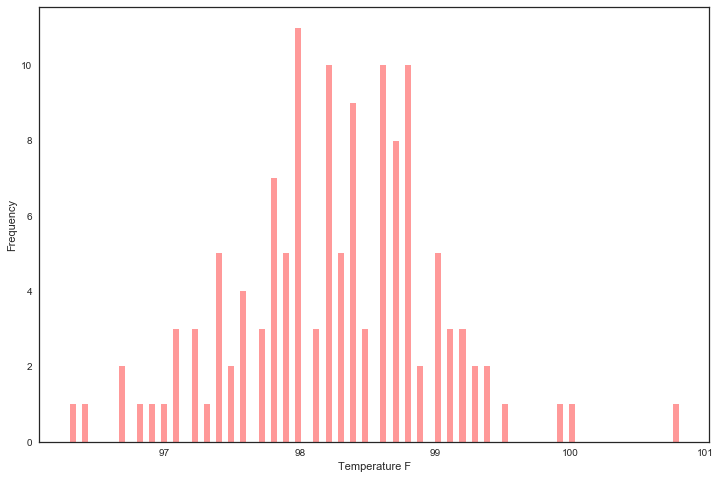

In [87]:
# Your work here.
plt.figure(figsize=(12,8))
sns.distplot(df.temperature, kde =False, bins = 100, color="red")
plt.xlabel("Temperature F")
plt.ylabel("Frequency")

The sample distribution is reasonably normal. To confirm, let us carry out a quick normality test.

In [88]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The p-value is greater than mostly used significance level of 0.05. This means that the null hypothesis, that the distribution is normal, cannot be rejected. Hence, we confirm that the sample distribution of temperature is normal. It is also likely that the population distribution would also be normal. 

Q2: Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [89]:
n = len(df)
print("Sample size:", n)

Sample size: 130


In [90]:
print("Samples for females: ", sum(df.gender == "F"))
print("Samples for males: ", sum(df.gender == "M"))

Samples for females:  65
Samples for males:  65


The sample size is sufficiently large (greater than 30) for both females and males. Therefore, the data is good enough to be used for statistical tests. 

About the independent observations: The observations for temperature are independent because one person's temprature does not affect another person's temperature. In other words, there is no correlation between data points as shown below. The observation is random and follows a normal distribution too, as we saw before.

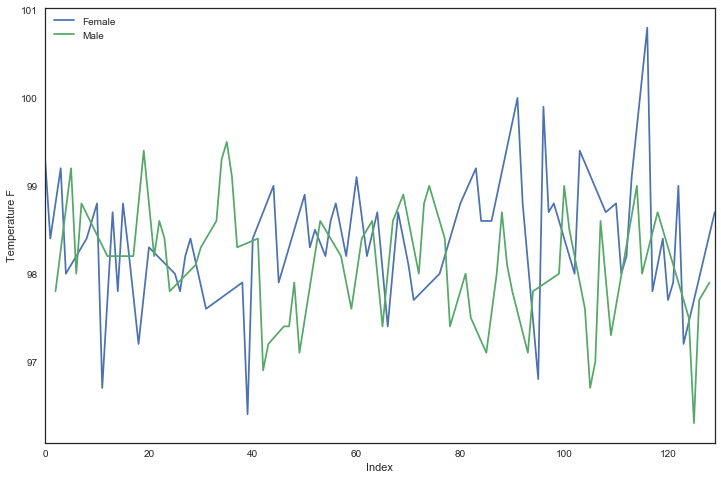

In [91]:
plt.figure(figsize=(12,8))
df.temperature[df.gender == "F"].plot(label="Female")
df.temperature[df.gender == "M"].plot(label="Male")
plt.xlabel("Index")
plt.ylabel("Temperature F")
plt.legend()

Q3: Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  tt  or  zz  statistic?
Now try using the other test. How is the result be different? Why?

Given: Population mean $\mu$ = 98.6. 

$H_0$: Sample mean $\mu_s = 98.6$

$H_a$: Sample mean $\mu_s \neq 98.6$

We should use one-sample test since we have only one group (or we are not comparing two groups). Also, we would use two-tailed test becasue we want to test if the sample mean is either far greater or far smaller than 98.6 degrees. Since the sample size is 130, we can use $z$ statistic.

In [92]:
smean = df.temperature.mean() # Sample mean
sstd = df.temperature.std() # Sample std deviation, which can be considered to be a good estimate for population std deviation
pmean = 98.6 # Population mean (null)
z_value = (smean - pmean)/(sstd/sqrt(n)) # The denominator is the std deviation of the sample distribution. We used CLT here.
p_value = 2*(1 - stats.norm.cdf(abs(z_value))) #multiplication by 2 because we are doing two-sided test
print("z-value:", z_value)
print("p-value:", p_value)

z-value: -5.45482329236
p-value: 4.90215701365e-08


Since the $p-$value is much smaller than even $\alpha = 0.01$, we reject the null hypothesis. Or, we reject the hypothesis that the true population mean is 98.6 degress.

Let's try to test the hypothesis using t-test now.

In [93]:
stats.ttest_1samp(df.temperature, pmean, axis=0)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The results for $t$-test are quite similar to that for $z$-test, which corroborates the fact that the sample size is sufficiently large. If the sample size was under 30 or like, then the $t$-test would have given accurate results. The $p$-value obtained from $t$-test is about $5$ times greater than that obtained from $z$-test (possibly because the t-distribution is fatter than the z distribution ), but is still much smaller than 0.01. Therefore, we can ssay that the true population mean for temperature is not 98.6 degrees F.

Q4: At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.


Let's first calculate a confidence interval based on 99% confidence.

In [94]:
zc = stats.norm.ppf(0.995) # z-value for 99% confidence (note that we calculate the z-value using 0.995 becasue its cumulative and both sides have 0.5%)
CI1 = smean - (zc*sstd/sqrt(n))
CI2 = smean + (zc*sstd/sqrt(n))
print("99% confidence interval:", CI1, "-", CI2)

99% confidence interval: 98.083593568 - 98.4148679705


So, we consider the normal temperature to be in the range $98.08 - 98.41$ with a confidence level of $99\%$. Any value of temperature beyong this range can be considered abnormal.

Q5: Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

Let's first find the mean normal tempratures for both males and females

In [95]:
means = df.groupby("gender")["temperature"].mean()
means

gender
F    98.393846
M    98.104615
Name: temperature, dtype: float64

The mean female temeprature is about 0.3 degress higher than that for males. However, is this 0.3 difference statistically significant? Before addressing this question, let us visualise the distribution of temperatures for both males and females. 

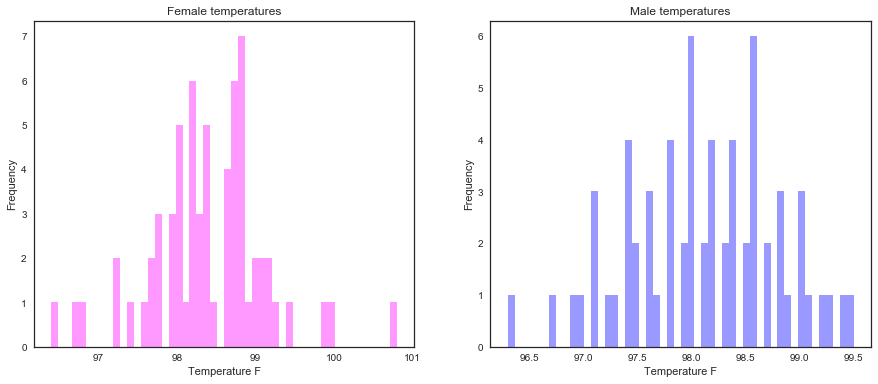

In [96]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
#plt.subplots(figsize=(12,8))
sns.distplot(df.temperature[df.gender=="F"], kde =False, bins = 50, ax=ax1, color="magenta")
sns.distplot(df.temperature[df.gender=="M"], kde =False, bins = 50, ax=ax2, color="blue")
ax1.set_title("Female temperatures")
ax2.set_title("Male temperatures")
ax1.set_xlabel("Temperature F")
ax1.set_ylabel("Frequency")
ax2.set_xlabel("Temperature F")
ax2.set_ylabel("Frequency")

In [97]:
df.groupby("gender")["temperature"].describe().unstack()

count       mean       std   min   25%   50%   75%    max
gender                                                           
F        65.0  98.393846  0.743488  96.4  98.0  98.4  98.8  100.8
M        65.0  98.104615  0.698756  96.3  97.6  98.1  98.6   99.5

The female temperature distribution is more spread out. 

Let's now carry out a hypothesis test (two-sample test and one-tailed) by assuming two independent samples (one for females and another for males). 

$H_0:$ No difference

$H_a:$ Mean female temperature > mean male temperature 

In [98]:
stats.ttest_ind(df.temperature[df.gender == "F"], df.temperature[df.gender == "M"], axis=0, equal_var=False)

Ttest_indResult(statistic=2.2854345381656112, pvalue=0.023938264182934196)

In [99]:
0.023938264182934196/2

0.011969132091467098

We used "equal_var = False" because the variance in both female and male distributions are different. Also, the p-value obtained above is for two-tailed test. We want to do one-tailed test, i.e. check if the mean female temperature is greater than the mean male temeprature. Therefore, the p-value would be 0.02394/2 = 0.01197. Since the $p$-value is smaller than the significance level 0.05, we reject the null hypothesis and confirm that the mean female temperature is greater than the mean male temperature, and we are 95% confident about that.

Conclusion:

For more than 120 years, the normal body temeprature of humans was thought to be $98.6^0$ F. Recent study, based on collecting temperature data from 130 humans, showed that the value of the mean temeprature has changed. Based on the samples in the study, the study suggestes that there is $99\%$ confidence that the mean normal temeprature of human body is between $98.08^0âˆ’98.41^0$ F. The study also found with 95% confidence that the mean female temperature is greater than the mean male temperature.